In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valkyrie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df1 = pd.read_csv("sms-spam.csv",encoding='latin-1')
df1['v1'].replace(['spam','ham'],[1,0],inplace=True)
df1.rename(columns={'v1':'is spam'},inplace=True)
df1.rename(columns={'v2':'text'},inplace=True)

df = df1.iloc[:,0:2]
df.head()

,is spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
is spam    5572 non-null int64
text       5572 non-null object
dtypes: int64(1), object(1)
memory usage: 87.1+ KB


In [5]:
df.groupby('is spam').describe()

text                                                               
        count unique                                                top freq
is spam                                                                     
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4

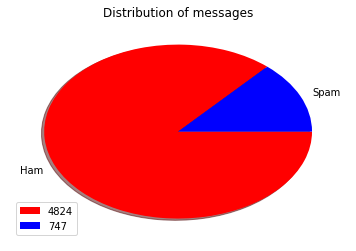

In [6]:
labels = [4824,747]
plt.pie([4824,747], colors=['r','b'],labels = ['Ham','Spam'],counterclock=False, shadow=True)
plt.title('Distribution of messages')
plt.legend(labels,loc=3)
plt.show()

In [7]:
def percentage_digits(text):
    counter = 0
    for i in text:
        if i.isdigit():
            counter += 1
    return (counter / len(text)) * 100

df['percentage digits'] = df['text'].apply(percentage_digits)
df.head()

,is spam,text,percentage digits
0,0,"Go until jurong point, crazy.. Available only ...",0.000000
1,0,Ok lar... Joking wif u oni...,0.000000
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032
3,0,U dun say so early hor... U c already then say...,0.000000
4,0,"Nah I don't think he goes to usf, he lives aro...",0.000000


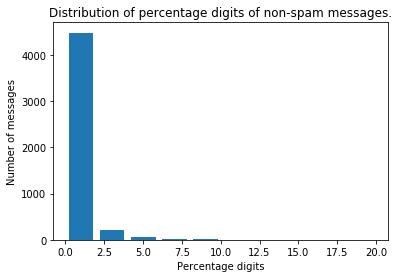

In [8]:
plt.hist(df[df['is spam'] == 0]['percentage digits'], bins=10, range=(0, 20), rwidth=0.8)
plt.xlabel('Percentage digits')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage digits of non-spam messages.')
plt.show()

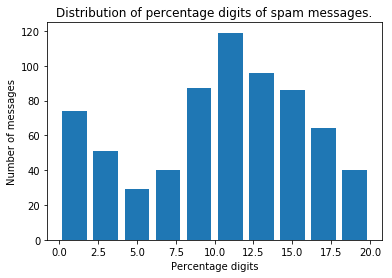

In [9]:
plt.hist(df[df['is spam'] == 1]['percentage digits'], bins=10, range=(0, 20), rwidth=0.8)
plt.xlabel('Percentage digits')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage digits of spam messages.')
plt.show()

In [10]:
def percentage_question_mark(text):
    counter = 0
    for i in text:
        if i == '?':
            counter += 1
    return (counter / len(text)) * 100

df['percentage question mark'] = df['text'].apply(percentage_question_mark)
df.head()

,is spam,text,percentage digits,percentage question mark
0,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0
1,0,Ok lar... Joking wif u oni...,0.000000,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0
3,0,U dun say so early hor... U c already then say...,0.000000,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0


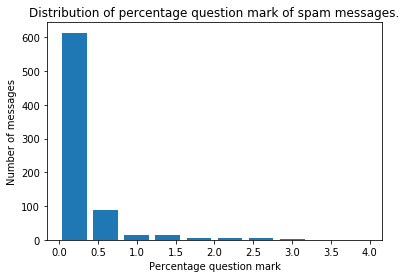

In [11]:
plt.hist(df[df['is spam'] == 1]['percentage question mark'], bins=10, range=(0, 4), rwidth=0.8)
plt.xlabel('Percentage question mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage question mark of spam messages.')
plt.show()

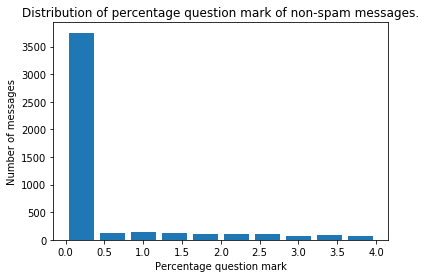

In [12]:
plt.hist(df[df['is spam'] == 0]['percentage question mark'], bins=10, range=(0, 4), rwidth=0.8)
plt.xlabel('Percentage question mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage question mark of non-spam messages.')
plt.show()

In [13]:
def percentage_exclamation_mark(text):
    counter = 0
    for i in text:
        if i == '!':
            counter += 1
    return (counter / len(text)) * 100

df['percentage exclamation mark'] = df['text'].apply(percentage_exclamation_mark)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark
0,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0
1,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0
3,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0


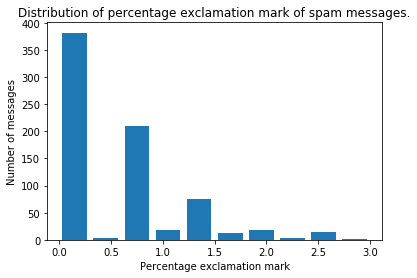

In [14]:
plt.hist(df[df['is spam'] == 1]['percentage exclamation mark'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage exclamation mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage exclamation mark of spam messages.')
plt.show()

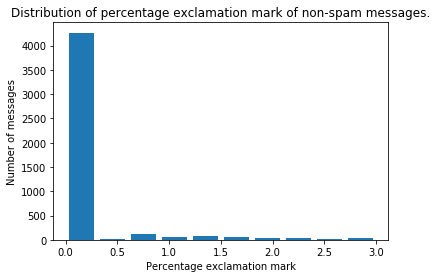

In [15]:
plt.hist(df[df['is spam'] == 0]['percentage exclamation mark'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage exclamation mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage exclamation mark of non-spam messages.')
plt.show()

In [16]:
def percentage_caps(text):
    counter = 0
    for i in text:
        if i.isupper():
            counter += 1
    return (counter / len(text)) * 100

df['percentage caps'] = df['text'].apply(percentage_caps)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps
0,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703
1,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613
3,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633
4,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689


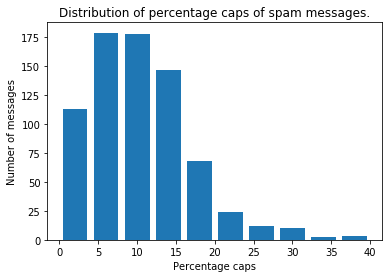

In [17]:
plt.hist(df[df['is spam'] == 1]['percentage caps'], bins=10, range=(0, 40), rwidth=0.8)
plt.xlabel('Percentage caps')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage caps of spam messages.')
plt.show()

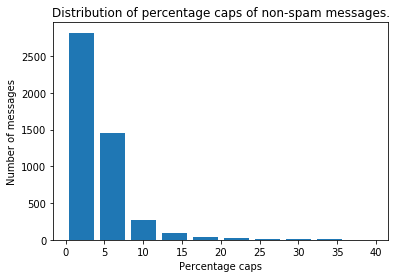

In [18]:
plt.hist(df[df['is spam'] == 0]['percentage caps'], bins=10, range=(0, 40), rwidth=0.8)
plt.xlabel('Percentage caps')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage caps of non-spam messages.')
plt.show()

In [19]:
df['length'] = df['text'].apply(len)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length
0,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703,111
1,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613,155
3,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633,49
4,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689,61


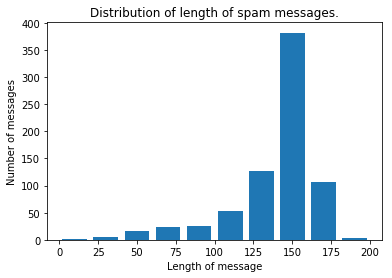

In [20]:
plt.hist(df[df['is spam'] == 1]['length'], bins=10, range=(0, 200), rwidth=0.8)
plt.xlabel('Length of message')
plt.ylabel('Number of messages')
plt.title('Distribution of length of spam messages.')
plt.show()

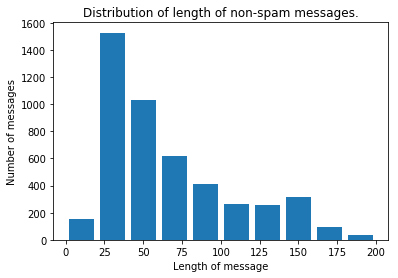

In [21]:
plt.hist(df[df['is spam'] == 0]['length'], bins=10, range=(0, 200), rwidth=0.8)
plt.xlabel('Length of message')
plt.ylabel('Number of messages')
plt.title('Distribution of length of non-spam messages.')
plt.show()

In [22]:
def percentage_colon(text):
    counter = 0
    for i in text:
        if i == ':':
            counter += 1
    return (counter / len(text)) * 100

df['percentage colon'] = df['text'].apply(percentage_colon)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage colon
0,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703,111,0.0
1,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552,29,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613,155,0.0
3,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633,49,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689,61,0.0


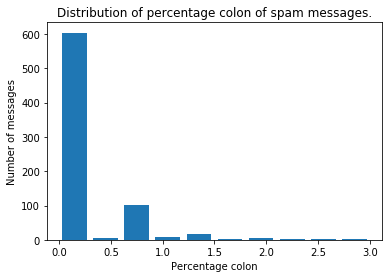

In [23]:
plt.hist(df[df['is spam'] == 1]['percentage colon'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage colon')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage colon of spam messages.')
plt.show()

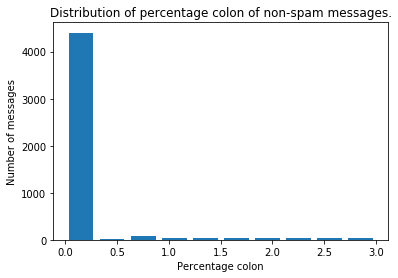

In [24]:
plt.hist(df[df['is spam'] == 0]['percentage colon'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage colon')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage colon of non-spam messages.')
plt.show()

In [25]:
def percentage_TandC(text):
    counter = 0
     
    for i in len(text):
        if (text[i]== 's' and text[i-1] == 'T') or (text[i] == '&' and text[i-1] == 'T'):
            counter += 1
    return (counter / len(text)) * 100

df['percentage TandC'] = df['text'].apply(percentage_TandC)
df.head()

TypeError: 'int' object is not iterable

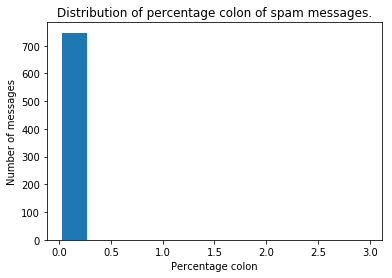

In [28]:
plt.hist(df[df['is spam'] == 1]['percentage colon'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage colon')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage colon of spam messages.')
plt.show()

In [152]:
def isalpha(word):
    wrod = word.replace('.', '')
    return word.isalpha()

def clean_sms(text):
    text = text.lower()
    return (' '.join(filter(lambda x: isalpha(x) and x not in stopwords.words("english"), text.split()))).replace('.', '').split()

In [153]:
cv = CountVectorizer(strip_accents='ascii', min_df=5, analyzer=clean_sms)
df = pd.concat([df, pd.DataFrame(cv.fit_transform(df['text']).todense(), columns=cv.get_feature_names(), index=np.arange(1, cv.fit_transform(df['text']).todense().shape[0] + 1))], axis=1)
df.head(2)

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage colon,abiola,able,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,ìï
0,0.0,"Go until jurong point, crazy.. Available only ...",0.0,0.0,0.0,2.702703,111.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Ok lar... Joking wif u oni...,0.0,0.0,0.0,6.896552,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
df.groupby('is spam').mean()

,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage colon,abiola,able,abt,accept,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,ìï
is spam,,,,,,,,,,,,,,,,,,,,,
0.0,0.420082,0.544954,0.233188,5.952566,71.023627,0.216844,0.001866,0.004975,0.004768,0.001451,...,0.004353,0.001036,0.004975,0.000829,0.002488,0.000829,0.000829,0.005804,0.001036,0.010572
1.0,11.579405,0.169521,0.524716,11.061228,138.866131,0.175312,0.000000,0.002677,0.002677,0.002677,...,0.000000,0.000000,0.001339,0.001339,0.002677,0.002677,0.001339,0.004016,0.000000,0.001339


In [155]:
x = df.shape[0]

y = df.shape[1]

X = df.iloc[1:x,2:y]

Y = df.iloc[1:x,0]


In [156]:
print("X.shape:", X.shape)
print("y.shape:", Y.shape)

X.shape: (5572, 1289)
y.shape: (5572,)


In [157]:
X_train, X_other, y_train, y_other = train_test_split(X, Y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

print("Train dataset size: ", X_train.shape[0])
print("CV size: ", X_cv.shape[0])
print("Test size: ", X_test.shape[0])

Train dataset size:  3343
CV size:  1114
Test size:  1115


In [158]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [159]:
print(classification_report(y_cv, clf.predict(X_cv), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_cv, clf.predict(X_cv)))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [160]:
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)

In [161]:
print(classification_report(y_cv, clf.predict(X_cv), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_cv, clf.predict(X_cv)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').